# Gridding 

In [1]:
%matplotlib inline

import sys, os
sys.path.append(os.path.join('..','..'))

from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (8.0, 8.0)
pylab.rcParams['image.cmap'] = 'rainbow'

import numpy

from matplotlib import pyplot as plt


from arl.fourier_transforms.convolutional_gridding import *
from arl.fourier_transforms.convolutional_gridding import coordinates


import logging
log = logging.getLogger()
log.setLevel(logging.DEBUG)
log.addHandler(logging.StreamHandler(sys.stdout))

In [2]:
shape=(256,256)
oversampling=8
support=3

The most common anti-aliasing function used is a prolate spheroidal function. The function grdsf calculates this 
for a particular choice of parameters. Here we plot that function.

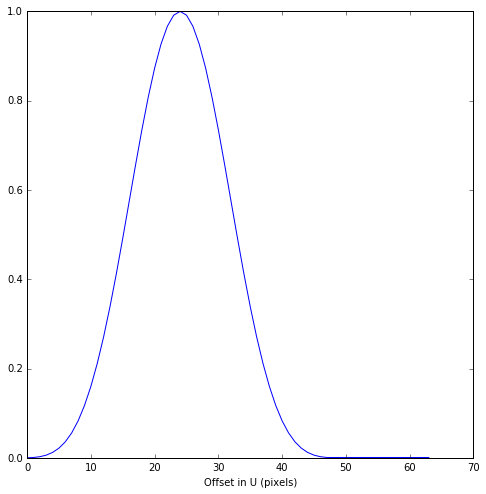

In [3]:
nu = numpy.arange(- 1.0, +1.0, 1.0 / (support * oversampling))
s1d = 2 * support + 2
kernel1d  = numpy.pad(grdsf(nu)[1], (0, 2 * oversampling), 'edge')

plt.clf();
plt.plot(kernel1d)
plt.xlabel('Offset in U (pixels)')

Now we will look at how this function is rearranged in 1D to facilitate gridding

range(56, -8, -8)
range(57, -7, -8)
range(58, -6, -8)
range(59, -5, -8)
range(60, -4, -8)


range(61, -3, -8)
range(62, -2, -8)
range(63, -1, -8)


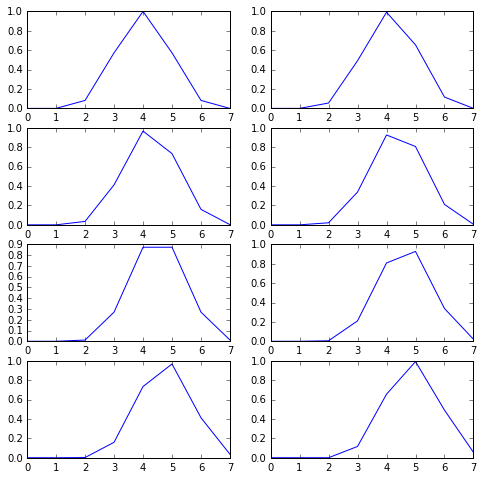

In [4]:
l1d = len(kernel1d)
c1d = l1d // 2
plt.clf()
i = 0
for xf in range(oversampling):
    mx = range(xf, l1d, oversampling)[::-1]
    print(mx)
    plt.subplot(4, oversampling // 4, i+1)
    plt.plot(kernel1d[mx])
    i += 1

### Now we assemble this in two dimensions, structured so that a slice the last two axes are the fractional offsets

range(56, -8, -8)
range(57, -7, -8)
range(58, -6, -8)
range(59, -5, -8)
range(60, -4, -8)
range(61, -3, -8)
range(62, -2, -8)
range(63, -1, -8)
(8, 8, 8, 8)


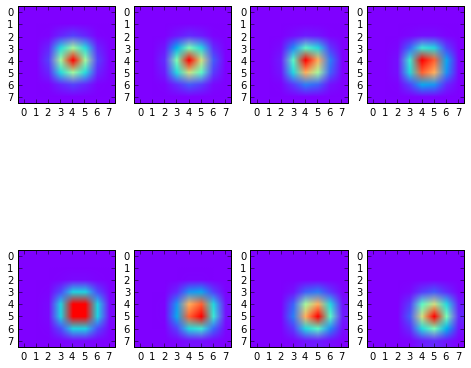

In [5]:
l1d = len(kernel1d)
c1d = l1d // 2
kernel4d = numpy.zeros((oversampling, oversampling, s1d, s1d))
for yf in range(oversampling):
    my = range(yf, l1d, oversampling)[::-1]
    print(my)
    for xf in range(oversampling):
        mx = range(xf, l1d, oversampling)[::-1]
        kernel4d[yf, xf] = numpy.outer(kernel1d[my], kernel1d[mx])
print(kernel4d.shape)
plt.clf();
for i in range(oversampling):
    plt.subplot(2, oversampling // 2, i+1)
    plt.imshow(kernel4d[i,i].real)

This calculation is performed by anti_aliasing_standard.

(8, 8, 8, 8) (1+0j)


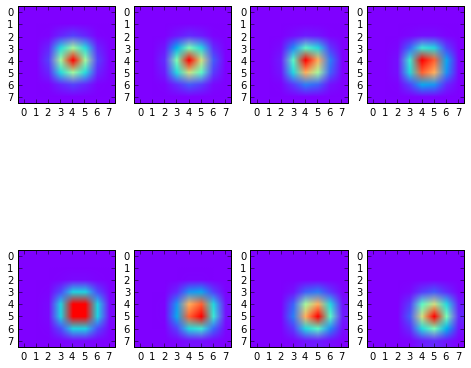

In [6]:
gs, ks = anti_aliasing_standard(shape=shape, oversampling=oversampling, 
                                   support=3)
ks = ks / ks.max()
print(ks.shape, ks.max())
plt.clf();
for i in range(oversampling):
    plt.subplot(2, oversampling // 2, i+1)
    plt.imshow(numpy.abs(ks[i,i]))

anti_aliasing_crocodile works differently. The grid correction function
is calculated by grdsf but the corresponding convolution function is calculated via an FFT,
after padding the gcf by the oversampling factor. This is equivalant to using
sinc interpolation.

(8, 8, 8, 8) (1+0j)


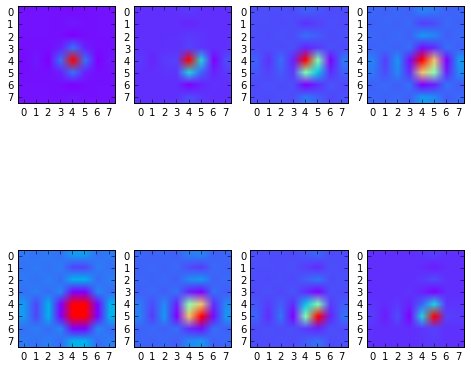

In [7]:
gc, kc = anti_aliasing_crocodile(shape=shape, oversampling=oversampling)
kc = kc / kc.max()
print(kc.shape,kc.max())
plt.clf();
for i in range(oversampling):
    plt.subplot(2, oversampling // 2, i+1)
    plt.imshow(kc[i,i].real)

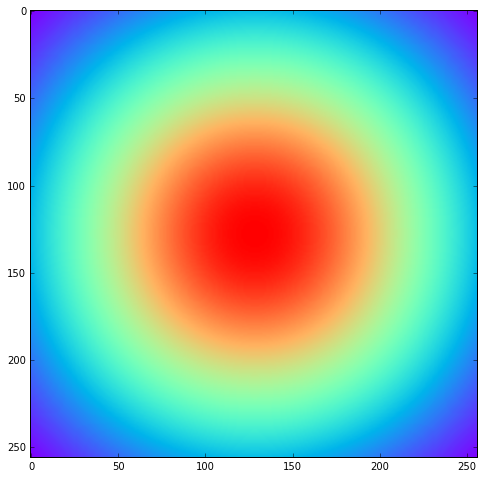

In [8]:
plt.clf()
plt.imshow(numpy.abs(gs))
plt.show()